### Initialize, read data, do corrections

In [88]:
# General definitions
%run '../definitions.ipynb'
%run '../treemakers.ipynb'
%run '../Analysis_class.ipynb'

# plt.style.use('latex_prl')
# def plt_savefig(filename, folder='plots'):
#     plt.savefig(os.path.join(folder, filename + '.pdf'))

In [89]:
local_data = False

if local_data:
    processed_data_path_er = '/home/erik/win/data/xams_run8/processed/er/'
    processed_data_path_nr = '/home/erik/win/data/xams_run8/processed/ambe/'
    minitree_path = '/home/erik/win/data/xams_run8/minitrees/'
else:
    processed_data_path_nr = '/data/xenon/xams/run8/processed_v2/'
    processed_data_path_er = '/data/xenon/xams/run8/processed_v2/'
    minitree_path = '/data/xenon/xams/run8/minitrees/'

In [90]:
run_names_nr = get_run_list(processed_data_path_nr, '170321_155957', '170321_155957') # 170322_081037
run_names_er = get_run_list(processed_data_path_er, '170323_144804', '170323_144804') # 170323_151843 (Cs)

Run list contains 1 files
Run list contains 1 files


In [91]:
x = XAMSAnalysis(run_names_nr, processed_data_path_nr, minitree_path)
x.load()

Loaded 78884 (78.9 k) events.


In [92]:
# Position correction
x.corr_z(1.5, 1.73)

### Time since previous (big) event

In [93]:
x.d['ns_since_previous_event'] = np.concatenate( ([0],np.diff(x.d.event_time)))
x.d['ms_since_previous_event'] = np.concatenate( ([0],np.diff(x.d.event_time))) * 1e-6

In [94]:
x.d['largest_peak'] = np.max((x.d[[
                's2', 'largest_other_s2', 's1', 'largest_other_s1', 'largest_coincidence', 'largest_unknown']]), axis=1)

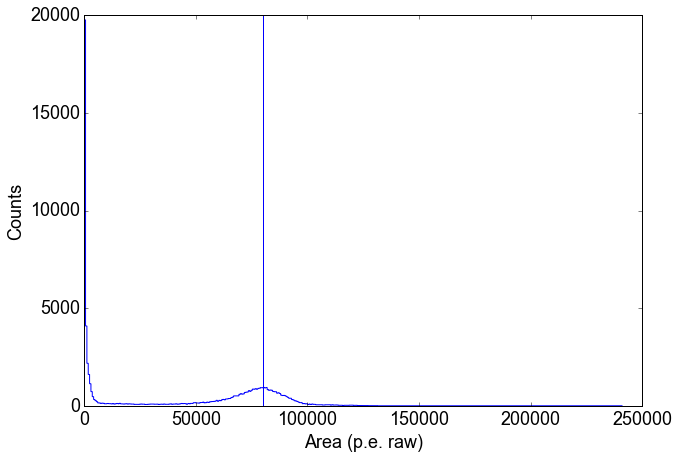

In [95]:
plt.hist(x.d['largest_peak'], bins=400, histtype='step')
plt.xlabel('Area (p.e. raw)')
plt.ylabel('Counts')
# plt.yscale('log')
plt.axvline(80e3)
plt.show()

In [96]:
large_event_threshold = 80e3

large_event_timestamps = np.array(x.d[x.d['largest_peak'] > large_event_threshold]['event_time'])
large_event_timestamps = np.concatenate([[x.d['event_time'].iloc[0]], large_event_timestamps])

In [97]:
asdf = []
for index, row in x.d.iterrows():
    dt = row['event_time'] - large_event_timestamps
    dt = dt[dt >= 0]
    time_since_previous_large_event = np.min(dt)
    asdf.append(time_since_previous_large_event)


In [98]:
x.d['ms_since_previous_large_event'] = np.array(asdf) * 1e-6

### Cuts

In [99]:
x.cut_interaction_exists()

Finite s1 selection: 23385 rows removed (70.36% passed)


In [100]:
x.cut_time_since_previous()

ms_since_previous_event above 1.0 selection: 7292 rows removed (86.86% passed)


In [101]:
x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle')

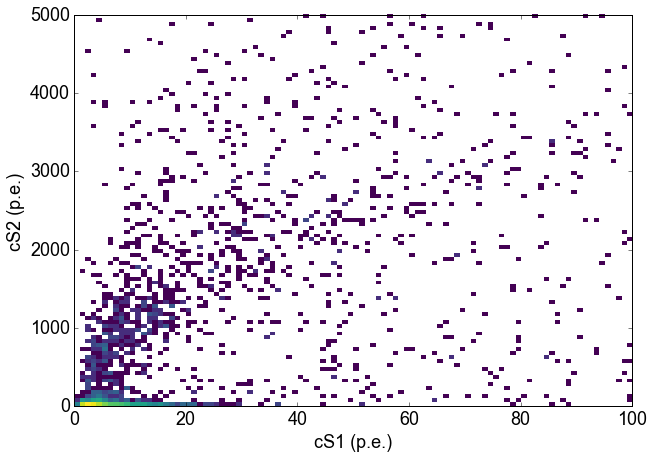

In [103]:
x.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 100),(0, 5e3)))

### Time difference cut

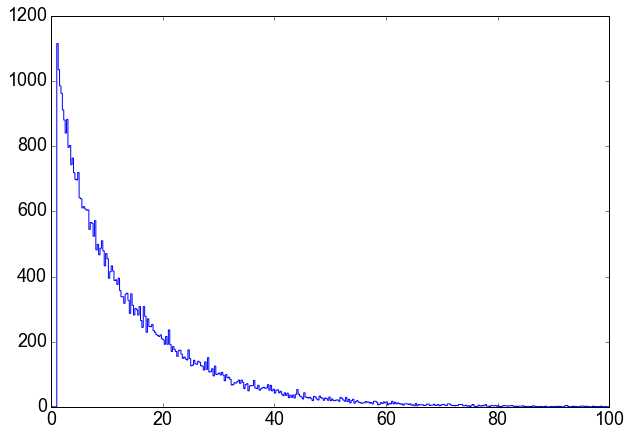

In [105]:
plt.hist(d['ms_since_previous_event'] , bins=400, histtype='step', range=(0, 100))
plt.show()

In [50]:
# rate
78882 / 900

87.64666666666666

In [51]:
fake_times = np.random.uniform(0, 900, 78882)

In [52]:
fake_times = np.sort(fake_times)

In [53]:
fake_dtimes = np.diff(fake_times) * 1e3

In [54]:
fake_dtimes_selected = np.random.choice(fake_dtimes, 55499)

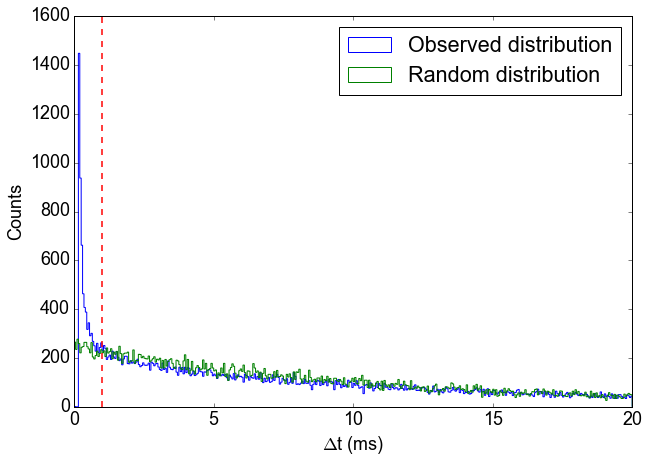

In [55]:
plt.hist(d['ms_since_previous_event'] , bins=400, histtype='step', range=(0, 20), label='Observed distribution')
plt.hist(fake_dtimes_selected , bins=400, histtype='step', range=(0, 20), label='Random distribution')
plt.legend()
plt.xlabel('$\Delta$t (ms)')
plt.ylabel('Counts')
plt.axvline(1, color='red', ls='--', lw=1.5)
plt.show()

In [56]:
sum(d['ms_since_previous_event'] < 1) / len(d)

0.13138975477035622

(0, 10000.0)

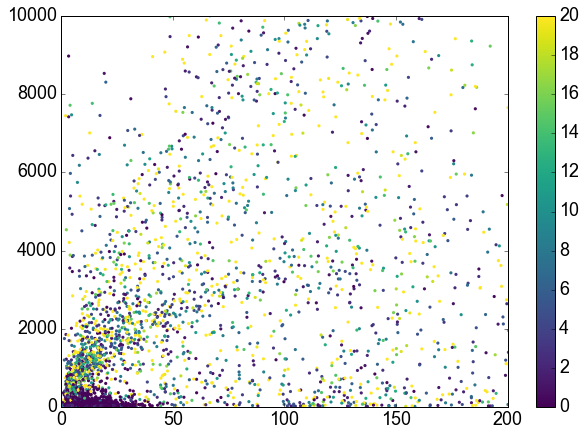

In [57]:
plt.scatter(d['cs1'], d['cs2'], edgecolor='None', c=d['ms_since_previous_event'], vmin=0, vmax=20, s=10)
plt.colorbar()
plt.xlim(0, 200)
plt.ylim(0, 10e3)

(0, 10000.0)

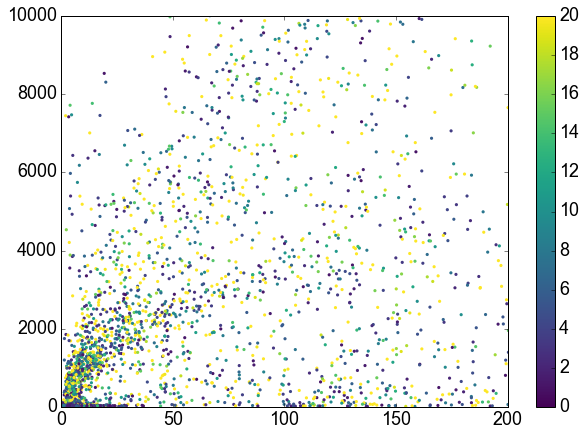

In [58]:
sel = d['ms_since_previous_event'] > 1.

plt.scatter(d['cs1'][sel], d['cs2'][sel], edgecolor='None', c=d['ms_since_previous_event'][sel], vmin=0, vmax=20, s=10)
plt.colorbar()
plt.xlim(0, 200)
plt.ylim(0, 10e3)

(0, 1000.0)

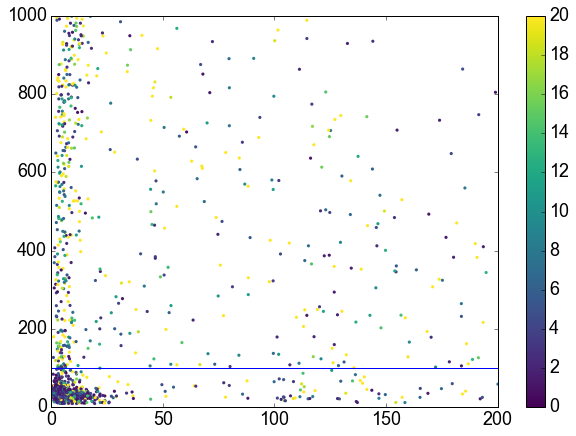

In [59]:
plt.scatter(d['cs1'][sel], d['cs2'][sel], edgecolor='None', c=d['ms_since_previous_event'][sel], vmin=0, vmax=20, s=10)
plt.colorbar()
plt.xlim(0, 200)
plt.axhline(100)
plt.ylim(0, 1e3)

(0, 1000.0)

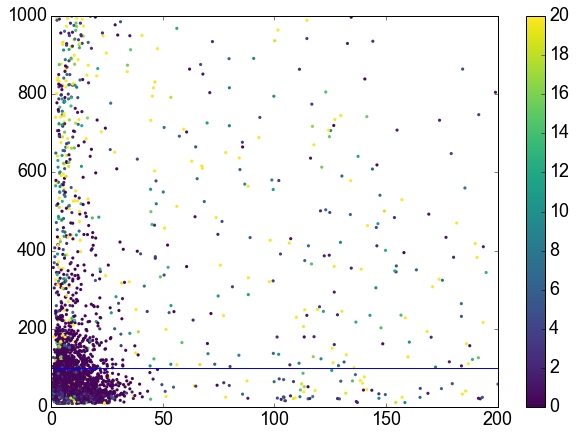

In [60]:
plt.scatter(d['cs1'], d['cs2'], edgecolor='None', c=d['ms_since_previous_event'], vmin=0, vmax=20, s=10)
plt.colorbar()
plt.xlim(0, 200)
plt.axhline(100)
plt.ylim(0, 1e3)

### Check for outliers

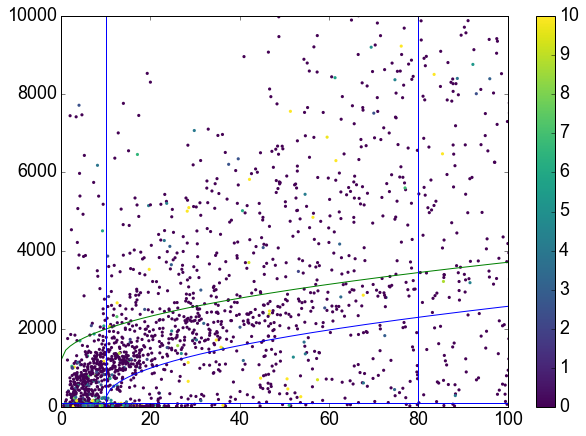

In [106]:
plt.scatter(d['cs1'][sel], d['cs2'][sel], edgecolor='None', c=d['largest_other_s1'][sel], vmin=0, vmax=10, s=10)
plt.colorbar()
plt.xlim(0, 100)
plt.axhline(100)
plt.ylim(0, 10e3)

def lower(s1):
    return 250*np.sqrt(s1 - 10) + 200

def upper(s1):
    return 250*np.sqrt(s1 - 0) + 1200

x_plot = np.linspace(0, 200, 200)
plt.plot(x_plot, lower(x_plot))
plt.plot(x_plot, upper(x_plot))
plt.axvline(80)
plt.axvline(10)

In [62]:
good = d[
    (d['cs1'] < 80) & (d['cs2'] > 100) & sel &
    (d['cs2'] < upper(d['cs1']) ) & (d['cs2'] > lower(d['cs1']) )
]

bad = d[
    (d['cs1'] < 80) & (d['cs2'] > 100) & sel &
    (d['cs2'] < lower(d['cs1']) )
]

(0, 10000.0)

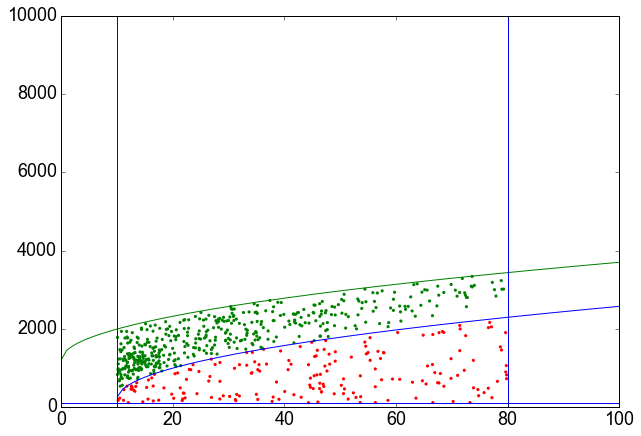

In [63]:
plt.scatter(bad['cs1'], bad['cs2'], edgecolor='None', color='red', s=10)
plt.scatter(good['cs1'], good['cs2'], edgecolor='None', color='green', s=10)
plt.plot(x_plot, lower(x_plot))
plt.plot(x_plot, upper(x_plot))
plt.axvline(80)
plt.axvline(10)

plt.xlim(0, 100)
plt.axhline(100)
plt.ylim(0, 10e3)

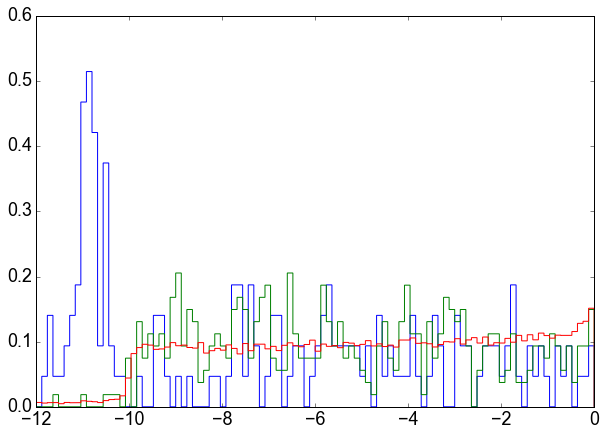

In [64]:
plt.hist(bad['z'], bins=100, histtype='step', normed=True, range=(-12,0))
plt.hist(good['z'], bins=100, histtype='step', normed=True, range=(-12,0))
plt.hist(x.d['z'], bins=100, histtype='step', normed=True, range=(-12,0))
plt.show()

Cutoff at 251.5 ns


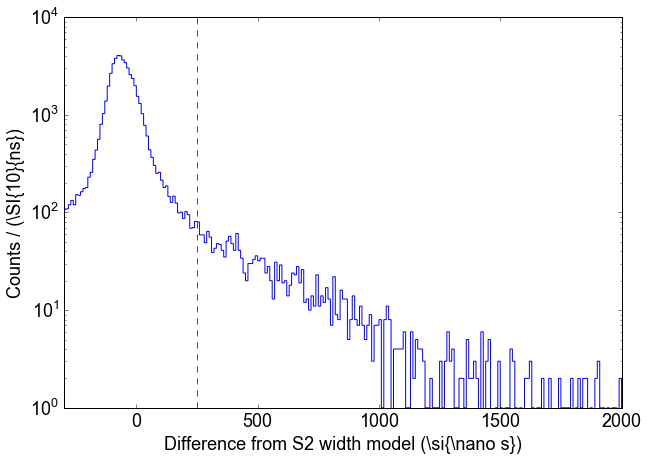

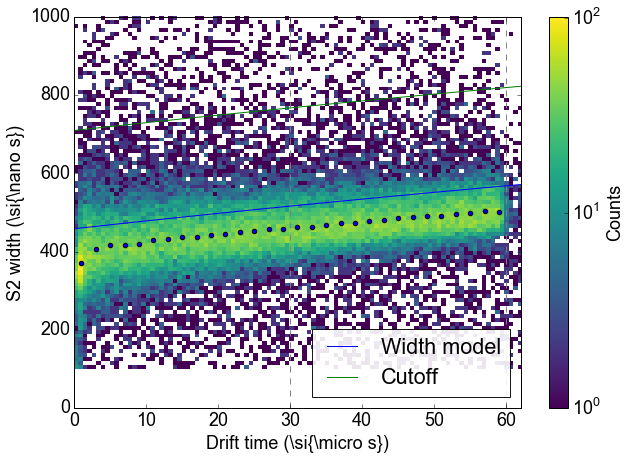

In [75]:
x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle', plot=True, apply=False)

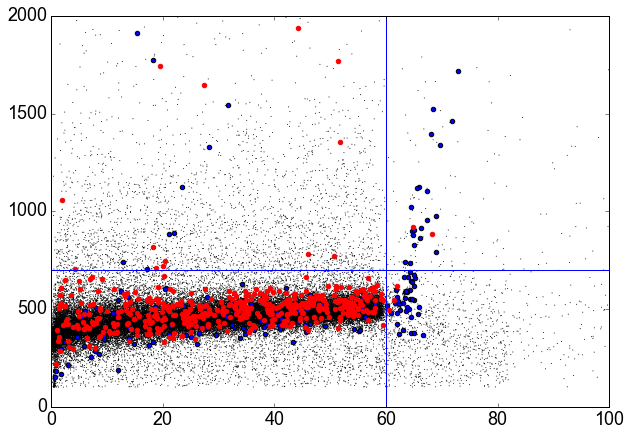

In [76]:
plt.scatter(d['drift_time'], d['s2_range_50p_area'], edgecolor='None', color='black', s=1)
plt.scatter(bad['drift_time'], bad['s2_range_50p_area'])
plt.scatter(good['drift_time'], good['s2_range_50p_area'], color='red')
plt.axvline(60)
plt.axhline(700)
plt.xlim(0, 100)
plt.ylim(0, 2000)
# plt.hist(bad['z'], bins=100, histtype='step', normed=True, range=(-12,0))
#plt.hist(good['z'], bins=100, histtype='step', normed=True, range=(-12,0))
#plt.hist(x.d['z'], bins=100, histtype='step', normed=True, range=(-12,0))
plt.show()

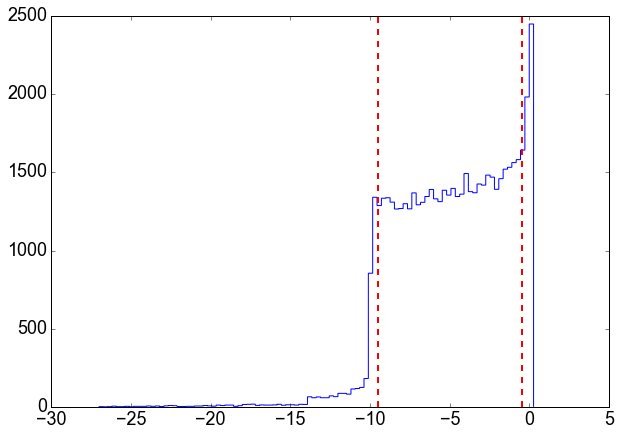

In [79]:
x.cut_fiducial_volume(plot=True, apply=False, bins=100, histtype='step')

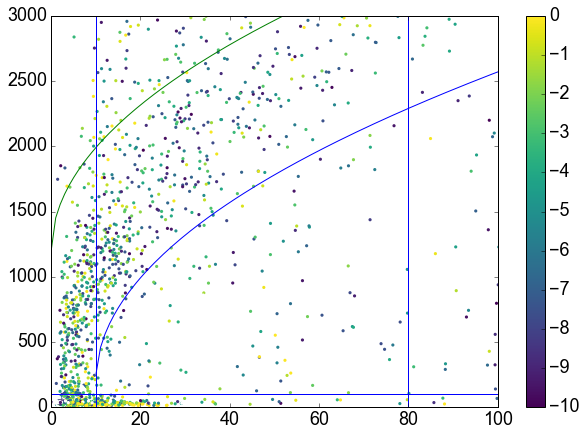

In [274]:
plt.scatter(d['cs1'][sel], d['cs2'][sel], edgecolor='None', c=d['z'][sel], vmin=-10, vmax=0,  s=10)
plt.colorbar()
plt.xlim(0, 100)
plt.axhline(100)
plt.ylim(0, 3e3)

def lower(s1):
    return 250*np.sqrt(s1 - 10) + 200

def upper(s1):
    return 250*np.sqrt(s1 - 0) + 1200

x_plot = np.linspace(0, 200, 200)
plt.plot(x_plot, lower(x_plot))
plt.plot(x_plot, upper(x_plot))
plt.axvline(80)
plt.axvline(10)

(0, 4000.0)

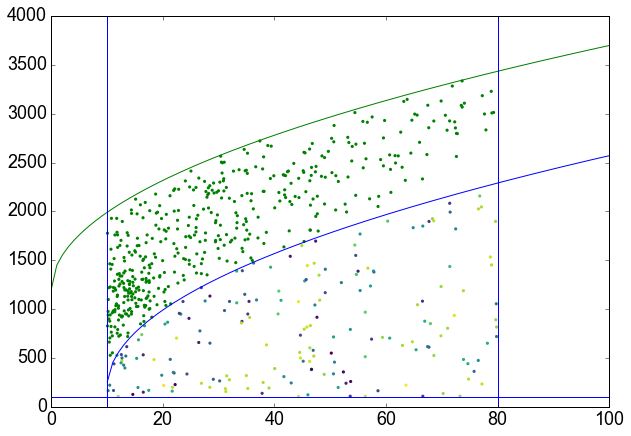

In [275]:
plt.scatter(bad['cs1'], bad['cs2'], edgecolor='None', c = bad['drift_time'], s=10)
plt.scatter(good['cs1'], good['cs2'], edgecolor='None', color='green', s=10)
plt.plot(x_plot, lower(x_plot))
plt.plot(x_plot, upper(x_plot))
plt.axvline(80)
plt.axvline(10)

plt.xlim(0, 100)
plt.axhline(100)
plt.ylim(0, 4e3)

In [277]:
len(bad[(bad['z'] > -9.5) & (bad['z'] < -0.5)]) / len(bad)

0.6195652173913043

In [278]:
len(good[(good['z'] > -9.5) & (good['z'] < -0.5)]) / len(good)

0.88470066518847

### Including dt cut

In [280]:
good = d[
    (d['z'] > -9.5) & (d['z'] < -0.5) & 
    (d['cs1'] < 80) & (d['cs2'] > 100) & sel &
    (d['cs2'] < upper(d['cs1']) ) & (d['cs2'] > lower(d['cs1']) )
]

bad = d[
    (d['z'] > -9.5) & (d['z'] < -0.5) & 
    (d['cs1'] < 80) & (d['cs2'] > 100) & sel &
    (d['cs2'] < lower(d['cs1']) )
]

In [282]:
len(bad)

114

(0, 3000.0)

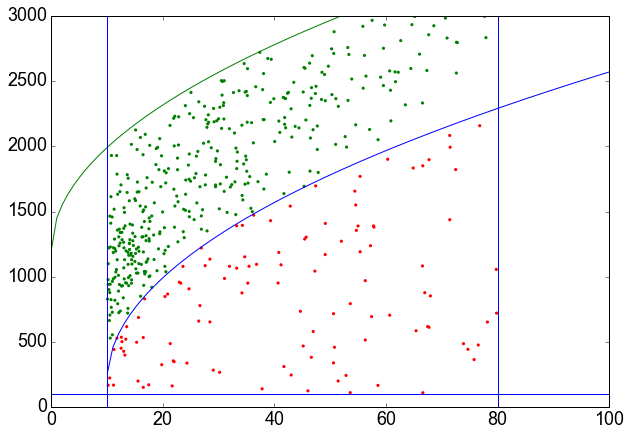

In [284]:
plt.scatter(bad['cs1'], bad['cs2'], edgecolor='None', color='red', s=10)
plt.scatter(good['cs1'], good['cs2'], edgecolor='None', color='green', s=10)
plt.plot(x_plot, lower(x_plot))
plt.plot(x_plot, upper(x_plot))
plt.axvline(80)
plt.axvline(10)

plt.xlim(0, 100)
plt.axhline(100)
plt.ylim(0, 3e3)

In [107]:
x.cuts_history()

,selection_desc,n_before,n_after,n_removed,fraction_passed,cumulative_fraction_left
0,Finite s1,78884,55499,23385,0.703552,0.703552
1,ms_since_previous_event above 1.0,55499,48207,7292,0.868610,0.611113


In [ ]:
x.cut_